In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('int20h-ds-test-dataset.csv')

In [3]:
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [4]:
df['event_attributes'] = df['event_attributes'].astype("string")

In [5]:
subscribers_list = df[(df['event_name'] == 'Subscription Premium')
                    | (df['event_attributes'] == '{"Premium Membership":"True"}')
                    | (df['event_name'] == 'Subscription Premium Renew')
                    ]['userid'].unique().tolist()
print("Amount of subscribers: ",len(subscribers_list))

Amount of subscribers:  799


Filtering dataframe to get users who subscribed at least once

In [6]:
df_subs = df[df['userid'].isin(subscribers_list)]

In [7]:
gone_users = df_subs[df_subs['event_name'] == 'Subscription Premium Cancel'].userid.unique().tolist()
print("Amount of subscribers who cancelled subscription: ",len(gone_users))

Amount of subscribers who cancelled subscription:  238


Set column to check if user cancelled subscription

In [8]:
df_subs['gone_user'] = df_subs['userid'].isin(gone_users)

Now we will find mean amounts of each event for subscribed and gone users. Then compare them to see which events indeed have higher or lower correlation with the potential account cancellation

In [9]:
df_events = df_subs[['userid', 'event_name', 'gone_user']]
df_events_per_user = df_events.groupby(['userid', 'event_name']).count().unstack(level=1,fill_value=0)['gone_user']
df_events_per_user['gone_user'] = df_events_per_user.index.isin(gone_users)
df_events_per_user

event_name,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Calculator Used,Calculator View,...,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Transaction Refund,Wallet Opened,gone_user
userid,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,False
00596aa4edee32815aaf4aad659c484e,0,0,0,0,2,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,False
007b54670d72df309afd87befcbb63db,0,0,0,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,False
0136a8eeca5d16ac1a521dd0e27ecec0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,2,0,0,False
01529f53aaba5b512168d432d5650556,2,0,0,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd422ac5f5772dc211a97910ea880db2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,False
fd4a11b9abba7352308fabf80c122501,0,0,0,0,1,2,0,5,0,0,...,0,0,0,1,1,0,0,0,0,False
fd5bc86aa11a1c4b1d17f1e78f50e4a5,0,0,0,0,1,0,0,2,0,0,...,0,1,0,1,1,1,0,0,0,True


In [10]:
df_mean_events = df_events_per_user.groupby(['gone_user']).mean()
df_mean_events

event_name,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Calculator Used,Calculator View,...,Order,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Transaction Refund,Wallet Opened
gone_user,,,,,,,,,,,,,,,,,,,,,
False,1.659537,0.099822,0.016043,0.11943,0.960784,0.180036,0.007130,1.001783,0.103387,0.454545,...,8.631016,0.001783,0.190731,0.001783,0.836007,0.869875,0.000000,0.488414,0.005348,1.256684
True,2.239496,0.235294,0.042017,0.10084,1.046218,0.231092,0.004202,0.957983,0.084034,0.563025,...,2.924370,0.000000,1.063025,0.004202,0.915966,0.936975,1.079832,0.151261,0.390756,2.109244


In [11]:
df_sum_events = df_events_per_user
df_mean_events.loc['total'] = df_sum_events.sum(numeric_only=True, axis=0)

In [12]:
df_mean_events

event_name,Account History Transaction Details,Account Setup Profile Skip,Account Setup Skip,Add Payment Method Failed,Add Payment Method Success,Add Vehicle Break,Add Vehicle Failed,Add Vehicle Success,Calculator Used,Calculator View,...,Order,Reset Password Set,Sign Out,Sign Up Error,Sign Up Success,Subscription Premium,Subscription Premium Cancel,Subscription Premium Renew,Transaction Refund,Wallet Opened
gone_user,,,,,,,,,,,,,,,,,,,,,
False,1.659537,0.099822,0.016043,0.11943,0.960784,0.180036,0.007130,1.001783,0.103387,0.454545,...,8.631016,0.001783,0.190731,0.001783,0.836007,0.869875,0.000000,0.488414,0.005348,1.256684
True,2.239496,0.235294,0.042017,0.10084,1.046218,0.231092,0.004202,0.957983,0.084034,0.563025,...,2.924370,0.000000,1.063025,0.004202,0.915966,0.936975,1.079832,0.151261,0.390756,2.109244
total,1464.000000,112.000000,19.000000,91.00000,788.000000,156.000000,5.000000,790.000000,78.000000,389.000000,...,5538.000000,1.000000,360.000000,2.000000,687.000000,711.000000,257.000000,310.000000,96.000000,1207.000000


In [13]:
df_events_stats = df_mean_events.T.reset_index().rename(columns={False:'not_gone', True:'gone'}).sort_values('gone', ascending=False)
df_events_stats['ratio'] = np.abs(df_events_stats['gone'] - df_events_stats['not_gone'])/df_events_stats['not_gone'] * 100

df_events_stats['rank'] = df_events_stats['ratio'] * (df_events_stats['total']/df_events_stats['total'].max())

df_events_stats = df_events_stats[~df_events_stats.event_name.isin(['Subscription Premium Cancel', 'Subscription Premium'])]

df_events_stats = df_events_stats.sort_values('rank', ascending=False)
df_events_stats

gone_user,event_name,not_gone,gone,total,ratio,rank
21,Transaction Refund,0.005348,0.390756,96.0,7207.142857,124.934221
11,Chat Conversation Started,0.390374,2.836134,894.0,626.516634,101.138655
10,Chat Conversation Opened,0.709447,3.037815,1121.0,328.194544,66.433023
13,Order,8.631016,2.924370,5538.0,66.117897,66.117897
15,Sign Out,0.190731,1.063025,360.0,457.343124,29.729781
22,Wallet Opened,1.256684,2.109244,1207.0,67.841945,14.786065
0,Account History Transaction Details,1.659537,2.239496,1464.0,34.947062,9.238443
20,Subscription Premium Renew,0.488414,0.151261,310.0,69.030240,3.864098
1,Account Setup Profile Skip,0.099822,0.235294,112.0,135.714286,2.744673
9,Calculator View,0.454545,0.563025,389.0,23.865546,1.676363


We will say, that event_name is significant, if its rank equal or higher than 1.5.

In [14]:
events = ['Transaction Refund',
 'Chat Conversation Started',
 'Chat Conversation Opened',
 'Order',
 'Sign Out',
 'Wallet Opened',
 'Account History Transaction Details',
 'Subscription Premium Renew',
 'Account Setup Profile Skip',
 'Calculator View']

Plotting results

<AxesSubplot: xlabel='event_name'>

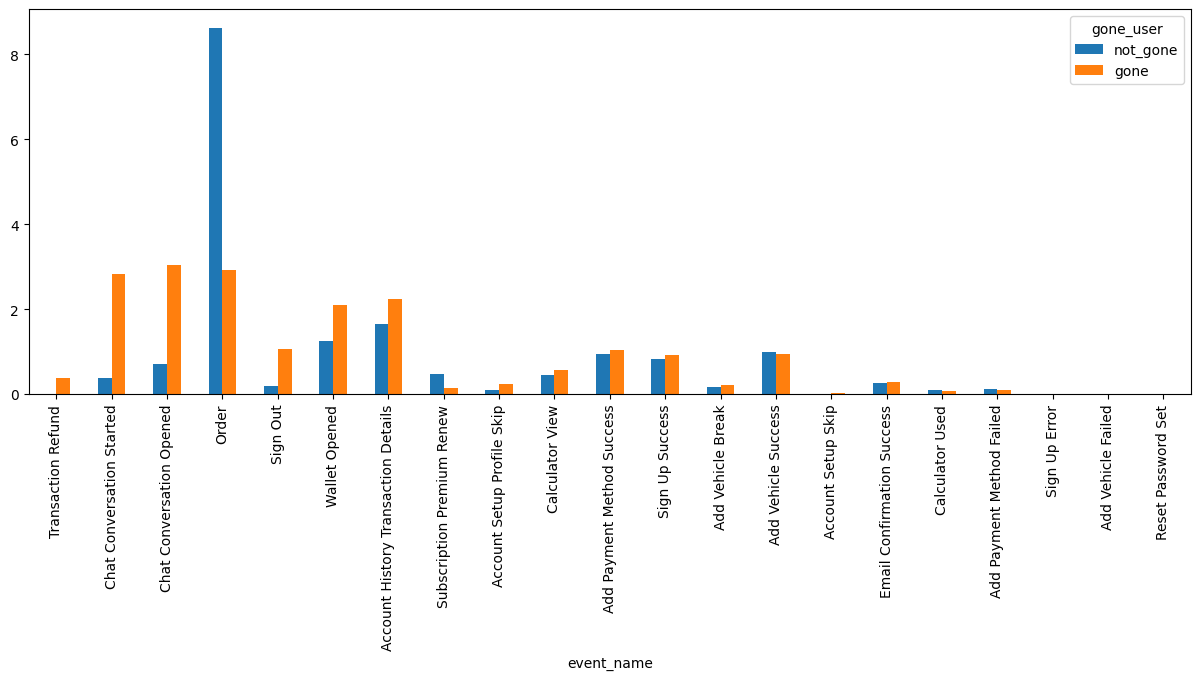

In [15]:
df_events_stats.plot(kind='bar',y=['not_gone', 'gone'], x='event_name', rot=90, figsize=(15,5))

As we can see, events
Chat Conversation Started,
Chat Conversation Opened,
Sign Out,
Wallet Opened,
Account History Transaction Details,
Transaction Refund,
Account Setup Skip,
Subscription Premium Renew,
Order
have really significant difference, so now we can say that these events have the highest correlation with the potential account cancellation.

Therefore, other events such as 
Calculator view,
Add Payment Method Success,
Sign Up Success,
Add Vehicle Break,
Email Confirmation Success,
Account Setup Skip,
Sign Up Error,
Reset Password Set,
Add Vehicle Failed,
Add Payment Method Failed,
Calculator Used,
Add Vehicle Success
have almost equal means, so they have the lowest correlation.

Also, we are not interested in Subscription Premium, Subscription Premium Cancel events.

In [16]:
df['event_name'].unique().tolist()

['Add Vehicle Success',
 'Add Vehicle Break',
 'Calculator View',
 'Add Payment Method Success',
 'Sign Up Success',
 'Add Payment Method Failed',
 'Wallet Opened',
 'Transaction Refund',
 'Email Confirmation Success',
 'Account Setup Skip',
 'Subscription Premium',
 'Chat Conversation Opened',
 'Account Setup Profile Skip',
 'Account History Transaction Details',
 'Sign Out',
 'Chat Conversation Started',
 'Order',
 'Sign Up Error',
 'Subscription Premium Cancel',
 'Calculator Used',
 'Subscription Premium Renew',
 'Add Vehicle Failed',
 'Reset Password Set']

Now we will research correlation for events with states.

Firstly, let's do this for Transaction Refund. In next cell we count how often this event occured in each state

In [17]:
df_transaction_refund = df_subs[df_subs['event_name'] == 'Transaction Refund']
df_refund_states = df_transaction_refund[['userid', 'user_state', 'gone_user']]
df_refund_states_count = df_refund_states.groupby(['userid', 'user_state']).count().unstack(level=1,fill_value=0)['gone_user']
df_refund_states_count['gone_user'] = df_refund_states_count.index.isin(gone_users)
df_refund_states_count

user_state,AL,AZ,CA,DC,FL,GA,IL,IN,NJ,NY,TX,VA,WV,gone_user
userid,,,,,,,,,,,,,,
0871c09afb84920b8bfd27b3c328c86a,0,0,0,0,1,0,0,0,0,0,0,0,0,True
0bd397383b7b3070af45cb75d9e44c30,0,0,1,0,0,0,0,0,0,0,0,0,0,True
0fc0cec5a0e21c62feb9a7c5217c36d8,0,0,0,0,3,0,0,0,0,0,0,0,0,True
11b9f94b9c956fa7197e02323663a454,0,0,0,0,0,0,0,0,0,1,0,0,0,True
13d8a03074dd4502c5acb82fc65e2b33,0,0,1,0,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dfdd0c050e79fc5ad02384f4e1b8411c,0,0,0,0,0,0,0,0,0,0,1,0,0,True
e6d239e26b1205f98c76219c3beba9a8,0,0,3,0,0,0,0,0,0,0,0,0,0,True
f03ba132c763930a09d29df3c23f8bea,0,0,1,0,0,0,0,0,0,0,0,0,0,True


Also, we need to know amount subscribers in each state, because we will evaluate mean value for states later. We have different amount of subscribers in states, so mean value will be more precise metric

In [18]:
df_subs_in_state = df_subs[['userid', 'user_state', 'gone_user']].drop_duplicates('userid').groupby(['user_state']).count()['userid']

Here we are summing event counts for gone and not gone users

In [19]:
df_refund_states_count = df_refund_states_count.groupby(['gone_user']).sum().T.reset_index().rename(columns={False:'not_gone', True:'gone'}).sort_values('gone', ascending=False)
df_refund_states_count

gone_user,user_state,not_gone,gone
2,CA,0,44
4,FL,0,15
6,IL,0,9
10,TX,0,9
11,VA,0,6
8,NJ,0,2
9,NY,3,2
0,AL,0,1
1,AZ,0,1
3,DC,0,1


Merging dataframes to evaluate mean value

In [20]:
df_refund_states_mean = pd.merge(df_refund_states_count, df_subs_in_state, on='user_state', how='inner').rename(columns={'userid':'subs_in_state'})

Getting mean values and ranking by their difference. Plotting means

,user_state,not_gone,gone,subs_in_state,rank
7,AL,0.000000,1.000000,1,1.000000
10,GA,0.000000,1.000000,1,1.000000
12,WV,0.000000,1.000000,1,1.000000
9,DC,0.000000,0.333333,3,0.333333
1,FL,0.000000,0.238095,63,0.238095
4,VA,0.000000,0.230769,26,0.230769
2,IL,0.000000,0.219512,41,0.219512
8,AZ,0.000000,0.200000,5,0.200000
11,IN,0.000000,0.166667,6,0.166667
0,CA,0.000000,0.128655,342,0.128655


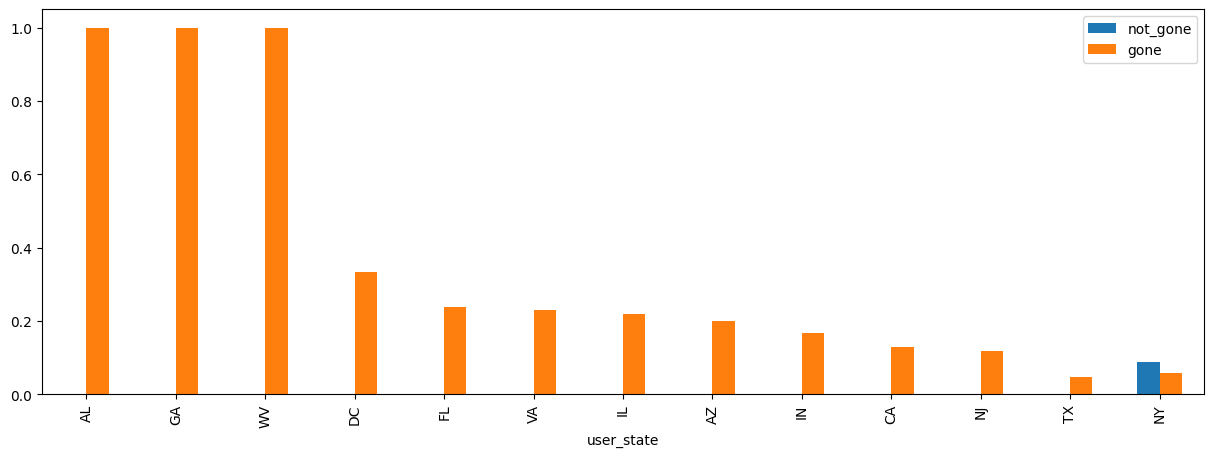

In [21]:
df_refund_states_mean['not_gone'] = df_refund_states_mean['not_gone']/df_refund_states_mean['subs_in_state']
df_refund_states_mean['gone'] = df_refund_states_mean['gone']/df_refund_states_mean['subs_in_state']
#df_refund_states_mean['rank'] = np.abs(df_refund_states_mean.gone - df_refund_states_mean.not_gone)
df_refund_states_mean['rank'] = df_refund_states_mean.gone - df_refund_states_mean.not_gone
df_refund_states_mean.sort_values('rank', ascending=False, inplace=True)
df_refund_states_mean.plot(kind='bar',y=['not_gone', 'gone'], x='user_state', rot=90, figsize=(15,5))
df_refund_states_mean

Writing function to prioritize states correlation for events. We are doing the same things as for Transaction Refund

In [36]:
def prioritize_states(df_subs, event_name):
    df_event_name = df_subs[df_subs['event_name'] == event_name]
    df_event_name_states = df_event_name[['userid', 'user_state', 'gone_user']]
    df_event_name_states_count = df_event_name_states.groupby(['userid', 'user_state']).count().unstack(level=1,fill_value=0)['gone_user']
    df_event_name_states_count['gone_user'] = df_event_name_states_count.index.isin(gone_users)
    df_event_name_states_count = df_event_name_states_count.groupby(['gone_user']).sum().T.reset_index().rename(columns={False:'not_gone', True:'gone'}).sort_values('gone', ascending=False)
    
    df_subs_in_state = df_subs[['userid', 'user_state', 'gone_user']].drop_duplicates('userid').groupby(['user_state']).count()['userid']

    df_event_name_states_mean = pd.merge(df_event_name_states_count, df_subs_in_state, on='user_state', how='inner').rename(columns={'userid':'subs_in_state'})

    df_event_name_states_mean['not_gone'] = df_event_name_states_mean['not_gone']/df_event_name_states_mean['subs_in_state']
    df_event_name_states_mean['gone'] = df_event_name_states_mean['gone']/df_event_name_states_mean['subs_in_state']

    #df_event_name_states_mean['rank'] = np.abs(df_event_name_states_mean.gone - df_event_name_states_mean.not_gone) 
    df_event_name_states_mean['rank'] = df_event_name_states_mean.gone - df_event_name_states_mean.not_gone
    df_event_name_states_mean.sort_values('rank', ascending=False, inplace=True)
    df_event_name_states_mean.plot(kind='bar',y=['not_gone', 'gone'], x='user_state', rot=90, figsize=(15,5), xlabel=event_name)
    return df_event_name_states_mean[['user_state','rank']]
    

After manual check of every event_attributes for our events, we will write in event_with_notna_attributes only events, which attributes is not empty.

In [23]:
events_with_notna_attributes = [
'Transaction Refund',
'Chat Conversation Opened',
'Sign Out',
'Account History Transaction Details',
'Subscription Premium Renew',
'Account Setup Profile Skip']

Now we'll build rank for types of sign out.

gone_user   event_attributes  not_gone      gone        rank
0            {"Type":"Auto"}  0.084507  0.915493  983.333333
1          {"Type":"Manual"}  0.605442  0.394558   24.038614


<AxesSubplot: xlabel='event_attributes'>

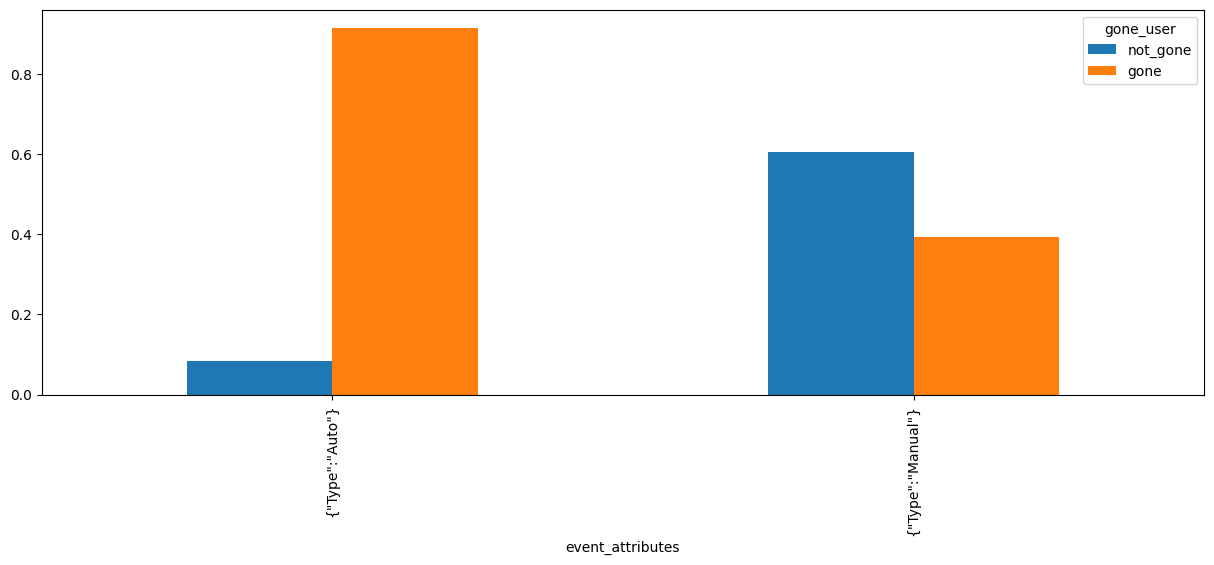

In [24]:
df_sign_out = df_subs[['userid','event_name','event_attributes','gone_user']]
df_sign_out = df_sign_out[df_sign_out['event_name'] == 'Sign Out']
df_sign_out = df_sign_out.drop(['event_name'],axis=1)
df_sign_out = df_sign_out.groupby(['event_attributes','gone_user']).count().unstack(level= 1,fill_value=0).rename(columns={False:'not_gone',True:'gone'})
df_sign_out = df_sign_out['userid']
df_sign_out['total'] = df_sign_out.sum(numeric_only=True, axis=1)
df_sign_out_rank = df_sign_out.reset_index()
df_sign_out_rank['not_gone'] = df_sign_out_rank['not_gone'] / df_sign_out_rank['total']
df_sign_out_rank['gone'] = df_sign_out_rank['gone'] / df_sign_out_rank['total']

df_sign_out_rank['ratio'] = np.abs(df_sign_out_rank['gone'] - df_sign_out_rank['not_gone'])/df_sign_out_rank['not_gone'] * 100
df_sign_out_rank['rank'] = df_sign_out_rank['ratio'] * (df_sign_out_rank['total']/df_sign_out_rank['total'].max())

df_sign_out_rank.drop(columns=['total','ratio'],inplace=True)
df_sign_out_rank = df_sign_out_rank.sort_values('rank', ascending=False)
print(df_sign_out_rank)
df_sign_out_rank.plot(kind='bar',y=['not_gone', 'gone'], x='event_attributes', rot=90, figsize=(15,5))

As we can see, if user is not using our program for a long term and gets signed out automatically means that this user is nomore interested in our program and will cancel premium subscription. Maybe some of them are just forgetting about existence of our program and some notifications will lower this high difference.
Also we see, that if user signs out manual, the rank of users, that gone is lower than not gone.

In [37]:
events_with_notna_attributes

['Transaction Refund',
 'Chat Conversation Opened',
 'Sign Out',
 'Account History Transaction Details',
 'Subscription Premium Renew',
 'Account Setup Profile Skip']

In [27]:
df_sign_out = df_subs[['userid','event_name','event_attributes','gone_user']]
df_sign_out = df_sign_out[df_sign_out['event_name'] == 'Account Setup Profile Skip']
df_sign_out = df_sign_out.drop(['event_name'],axis=1)
df_sign_out.groupby(['event_attributes','gone_user']).count().unstack(level= 1,fill_value=0)

userid      
gone_user                         False True 
event_attributes                             
{"Screen":"Address Details"}          1     2
{"Screen":"Address details"}          6     3
{"Screen":"Address"}                 27    26
{"Screen":"Name"}                     3     5
{"Screen":"Phone Number"}             7     9
{"Screen":"Phone number exists"}      1     0
{"Screen":"Phone number"}            11    11

As we can see on our example event "Account Setup Profile Skip", there is not a big correlation with the potential account cancellation, so we can say that this attributes is not significant.

Next we will research correlation for events with users devices. We noticed that there are events which correspond to NaN's in event_platform and device_manufacture columns, so we suppose that these events don't depend on users' devices and they can be skipped.

In [28]:
df_subs[df_subs['event_platform'] == 'outofband'].event_name.value_counts()

Order                          5538
Subscription Premium            711
Subscription Premium Renew      310
Subscription Premium Cancel     257
Transaction Refund               96
Name: event_name, dtype: int64

In [29]:
df_subs[df_subs['device_manufacture'].isnull()].event_name.value_counts()

Order                          5538
Subscription Premium            711
Subscription Premium Renew      310
Subscription Premium Cancel     257
Transaction Refund               96
Name: event_name, dtype: int64

In [30]:
#Function to evaluate counts for platforms from dataframe with devices
def get_df_for_platforms(df):
    ios_not_gone = df[df['device_manufacture'] == 'Apple'].not_gone.values[0]
    ios_gone = df[df['device_manufacture'] == 'Apple'].gone.values[0]
    ios_subs_have_platform = ios_gone = df[df['device_manufacture'] == 'Apple'].subs_have_device.values[0]
    android_not_gone = df[df['device_manufacture'] != 'Apple'].not_gone.sum()
    android_gone = df[df['device_manufacture'] != 'Apple'].gone.sum()
    android_subs_have_platform = df[df['device_manufacture'] != 'Apple'].subs_have_device.sum()
    d = {'platform': ['ios', 'android'], 'not_gone': [ios_not_gone, android_not_gone], 'gone': [ios_gone, android_gone],
      'subs_have_platform': [ios_subs_have_platform, android_subs_have_platform] }
    res = pd.DataFrame(data = d)
    res['not_gone'] = res['not_gone']/res['subs_have_platform']
    res['gone'] = res['gone']/res['subs_have_platform']
    return res

In [31]:
def prioritize_devices(df_subs, event_name):
    df_event_name = df_subs[df_subs['event_name'] == event_name]
    df_event_name_devices = df_event_name[['userid', 'device_manufacture', 'gone_user']]
    df_event_name_devices_count = df_event_name_devices.groupby(['userid', 'device_manufacture']).count().unstack(level=1,fill_value=0)['gone_user']
    df_event_name_devices_count['gone_user'] = df_event_name_devices_count.index.isin(gone_users)
    df_event_name_devices_count = df_event_name_devices_count.groupby(['gone_user']).sum().T.reset_index().rename(columns={False:'not_gone', True:'gone'}).sort_values('gone', ascending=False)
    
    df_subs_in_state = df_subs[['userid', 'device_manufacture', 'gone_user']].drop_duplicates('userid').groupby(['device_manufacture']).count()['userid']

    df_event_name_devices_mean = pd.merge(df_event_name_devices_count, df_subs_in_state, on='device_manufacture', how='inner').rename(columns={'userid':'subs_have_device'})

    #Getting same stats for platforms - means IOS or Android
    df_event_name_platform_mean = get_df_for_platforms(df_event_name_devices_mean)
    df_event_name_platform_mean['rank'] = df_event_name_platform_mean.gone - df_event_name_platform_mean.not_gone
    df_event_name_platform_mean.sort_values('rank', ascending=False, inplace=True)
    df_event_name_platform_mean.plot(kind='bar',y=['not_gone', 'gone'], x='platform', rot=90, figsize=(15,5))


    df_event_name_devices_mean['not_gone'] = df_event_name_devices_mean['not_gone']/df_event_name_devices_mean['subs_have_device']
    df_event_name_devices_mean['gone'] = df_event_name_devices_mean['gone']/df_event_name_devices_mean['subs_have_device']

    df_event_name_devices_mean['rank'] = df_event_name_devices_mean.gone - df_event_name_devices_mean.not_gone
    df_event_name_devices_mean.sort_values('rank', ascending=False, inplace=True)
    df_event_name_devices_mean.plot(kind='bar',y=['not_gone', 'gone'], x='device_manufacture', rot=90, figsize=(15,5))
    
    return df_event_name_platform_mean[['platform','rank']] , df_event_name_devices_mean[['device_manufacture','rank']]
    

(  platform      rank
 1  android  1.276364
 0      ios  0.904968,
    device_manufacture      rank
 6                 BLU  2.500000
 0             samsung  1.484536
 5            Wingtech  1.250000
 2            motorola  1.160000
 4              Google  1.066667
 7                 FIH  1.000000
 3                 LGE  0.611111
 1               Apple  0.226782
 9             OnePlus  0.222222
 10                TCL -1.000000
 8          HMD Global -1.500000)

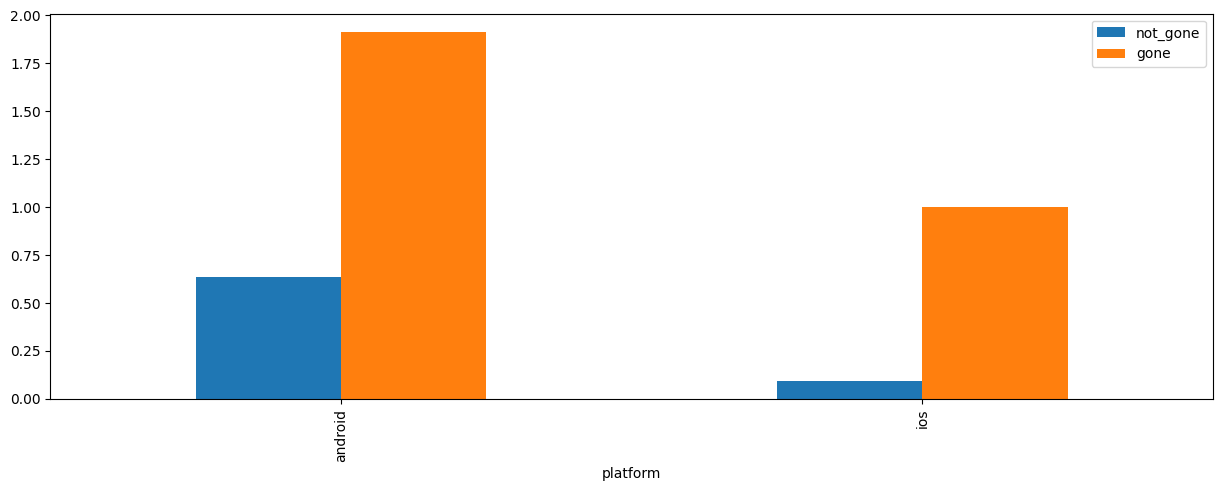

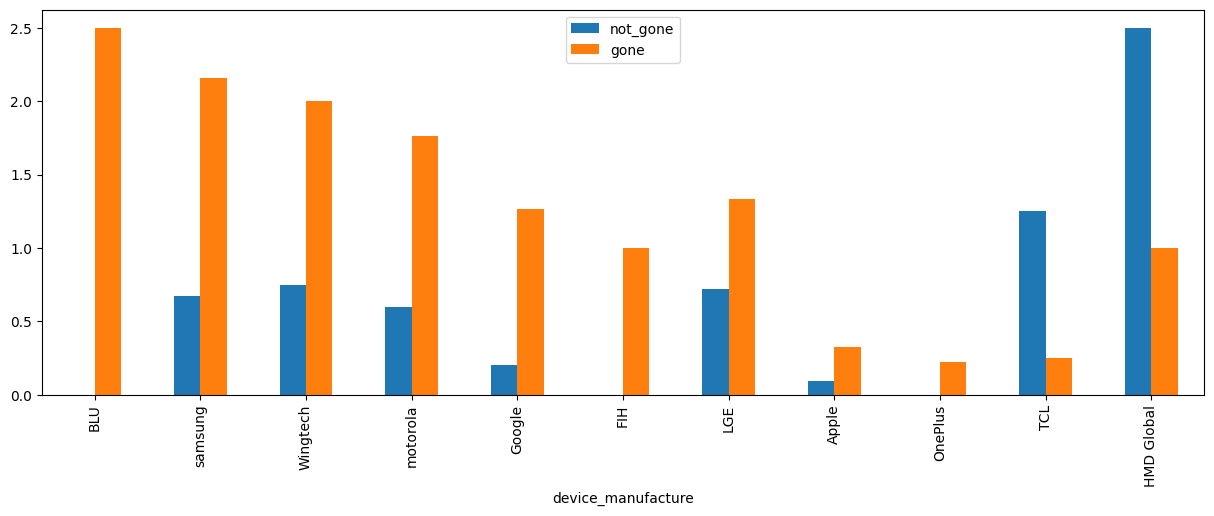

In [32]:
prioritize_devices(df_subs, 'Chat Conversation Started')

(  platform      rank
 0      ios  0.442765
 1  android  0.188192,
   device_manufacture      rank
 4           Wingtech  1.000000
 0              Apple  0.591793
 1            samsung  0.226804
 3                LGE  0.166667
 2           motorola  0.160000
 6            OnePlus  0.111111
 7                TCL  0.000000
 5             Google -0.066667
 8         HMD Global -2.000000)

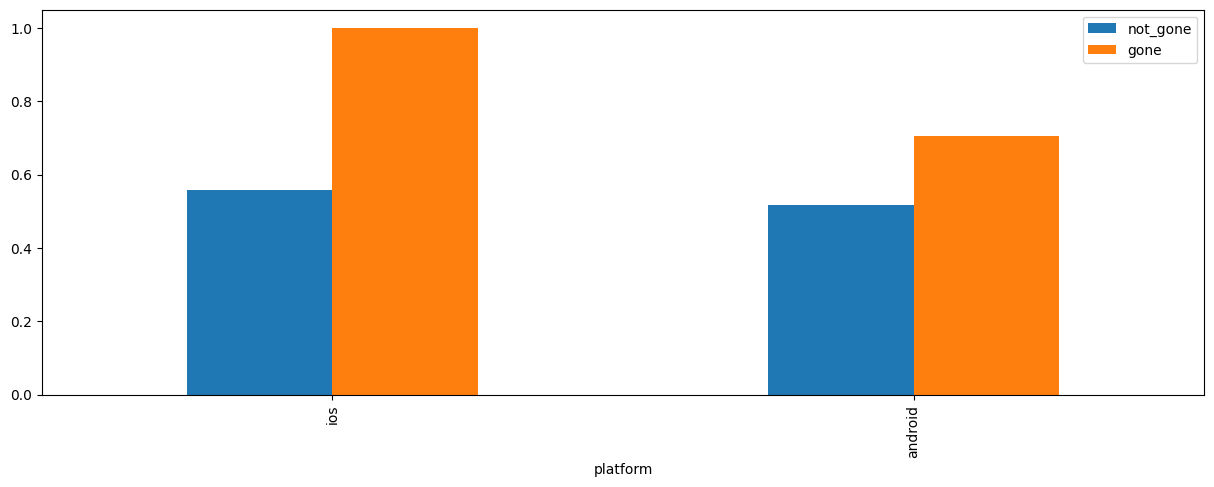

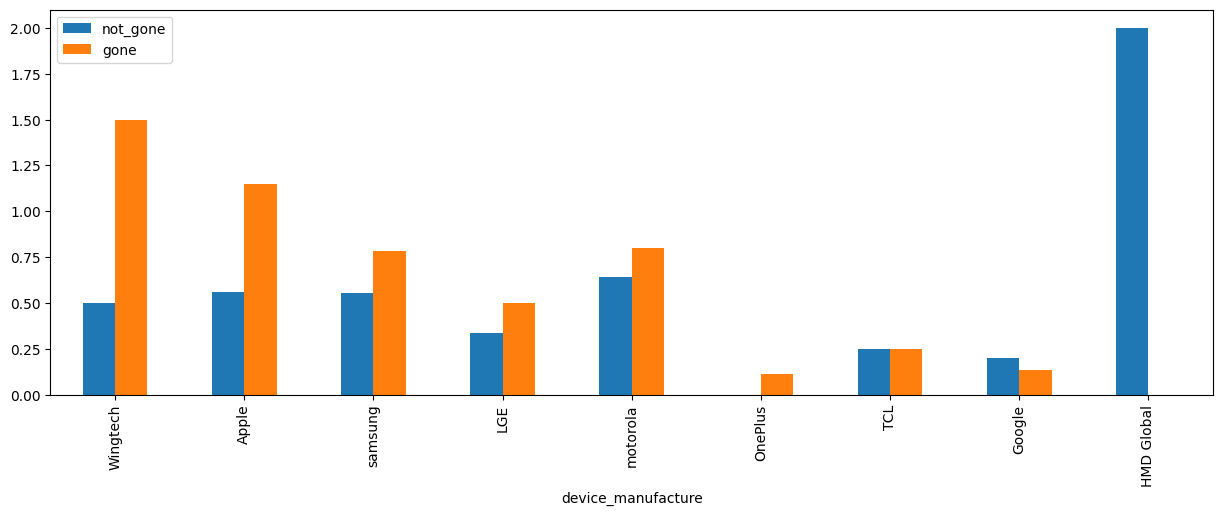

In [33]:
prioritize_devices(df_subs, 'Chat Conversation Opened')

(  platform      rank
 0      ios  0.900648
 1  android -0.064151,
   device_manufacture      rank
 3                BLU  1.000000
 0              Apple  0.352052
 4            OnePlus  0.111111
 2                LGE  0.055556
 1            samsung -0.067010
 7           motorola -0.160000
 5             Google -0.200000
 6         HMD Global -0.500000)

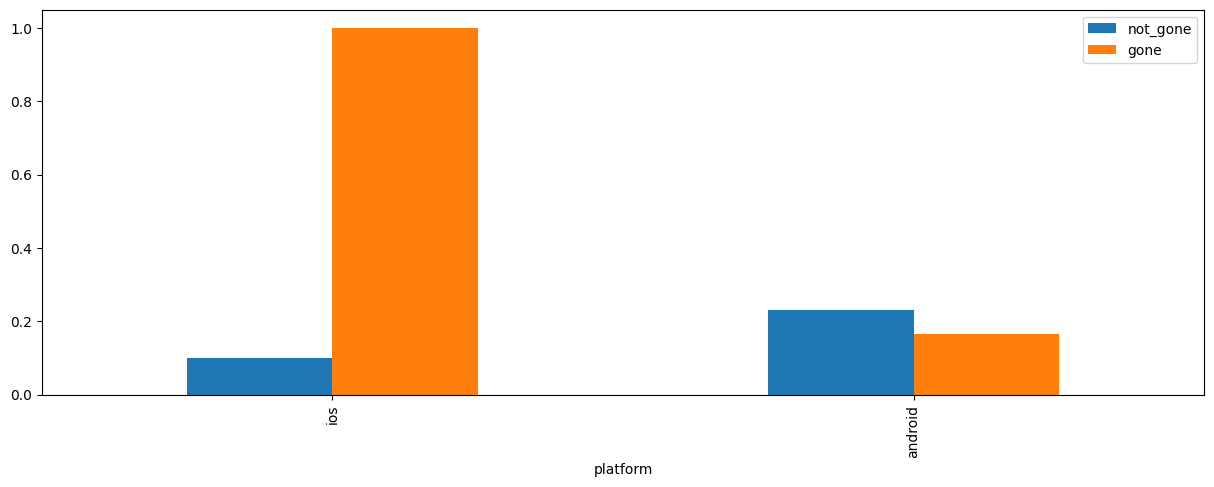

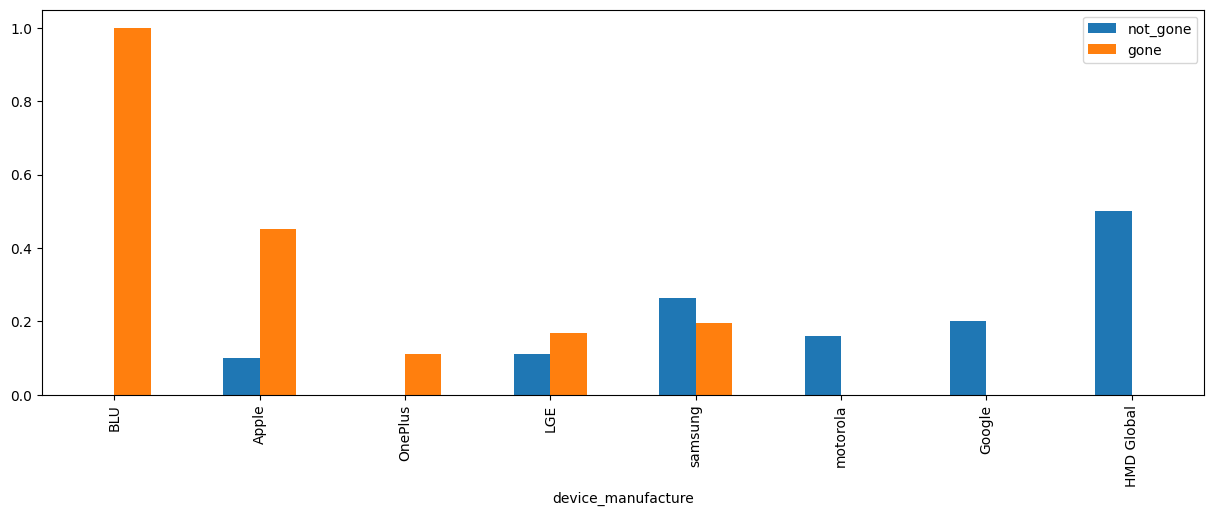

In [34]:
prioritize_devices(df_subs, 'Sign Out')

(  platform      rank
 0      ios  0.252700
 1  android -0.541818,
    device_manufacture       rank
 7                 BLU   0.500000
 8                 FIH   0.500000
 2                 LGE   0.444444
 3             OnePlus   0.333333
 0               Apple  -0.116631
 10           Wingtech  -0.250000
 5            motorola  -0.320000
 9                 TCL  -0.500000
 1             samsung  -0.572165
 4              Google  -1.000000
 6          HMD Global -12.500000)

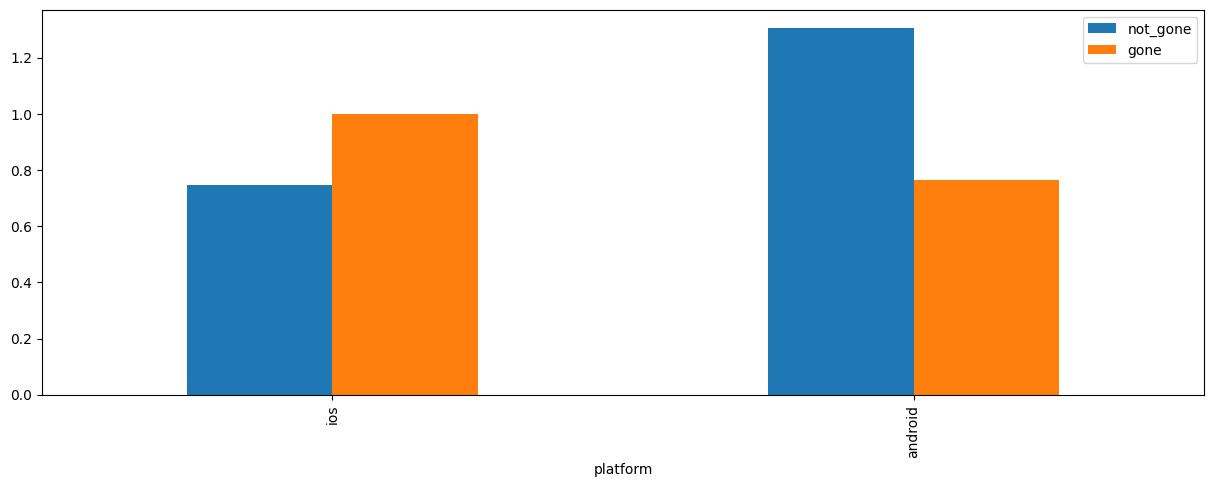

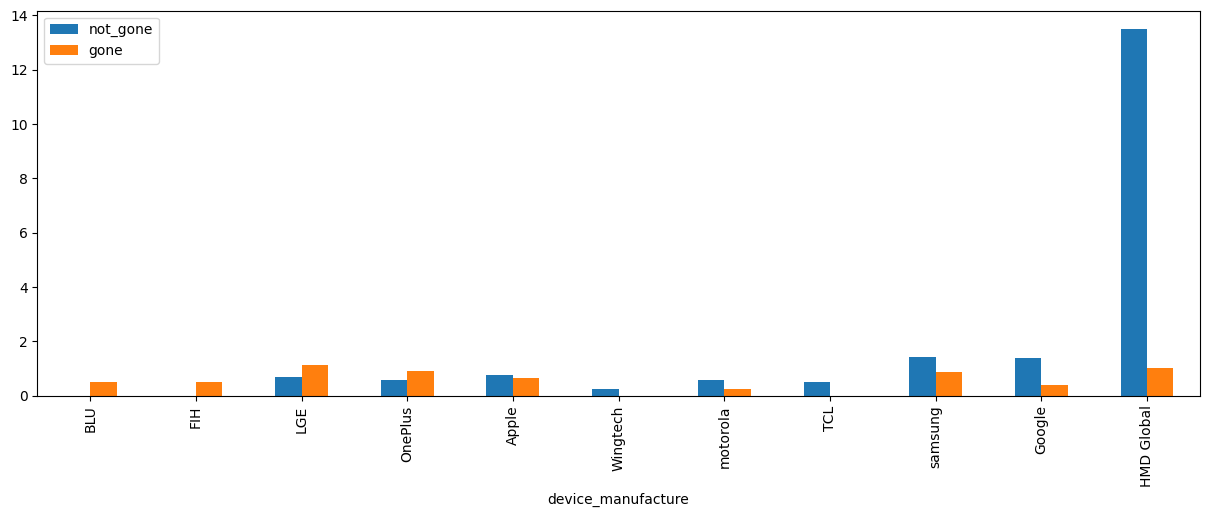

In [35]:
prioritize_devices(df_subs, 'Wallet Opened')